In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Dataset

In [3]:
dir = "/Users/yola.kamalita/Documents/Project/Data-Science-Learning-Projects/crimes_prediction/data"

In [4]:
df_new = pd.read_csv(os.path.join(dir, "df_new.csv"))
df_new_t = pd.read_csv(os.path.join(dir, "df_new_transform.csv"))

# Training, Validation, Test Split

In [5]:
X = df_new.drop('ViolentCrimesPerPop',axis=1)
y = df_new['ViolentCrimesPerPop'].values

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_training, y_training, test_size=0.10, random_state=42)

# PCA

In [72]:
def plot_variance(pca, width=20, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="PC Components", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="PC Components", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=20, dpi=100)
    return axs

# source: https://www.kaggle.com/code/ryanholbrook/principal-component-analysis

In [52]:
# Fit PCA

pca = PCA(random_state=42)

pca.fit(X_train,y_train)
X_train_pca = pca.transform(X_train)

In [53]:
X_train_pca.shape

(1613, 100)

In [98]:
# Convert to dataframe

pc_components = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
X_train_pca_scores = pd.DataFrame(X_train_pca, columns=pc_components)

In [99]:
# PC scores

X_train_pca_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,-1.114644,0.206297,0.217802,-0.095846,0.260505,-0.213863,-0.553968,0.047341,0.188796,-0.050755,...,-0.004843,0.007384,0.020488,-0.000089,-0.007617,-0.015541,0.014783,-0.003479,-0.003107,-0.004031
1,-0.216188,-0.182185,-0.206741,-0.733362,-0.021958,-0.248119,-0.595722,0.432395,-0.289300,-0.050610,...,-0.004588,-0.001016,0.011094,-0.017930,-0.012018,-0.014096,0.004338,-0.002477,-0.000399,-0.001705
2,0.044680,-0.230230,-0.021880,0.803046,-0.033927,-0.088128,0.242140,0.350686,0.092047,-0.353480,...,-0.006708,0.004934,-0.007717,0.004801,0.007701,-0.004710,-0.001015,-0.000950,-0.001806,0.000306
3,0.805195,-0.507086,-0.089594,0.988597,-0.011309,0.019320,0.551650,-0.189556,0.218253,-0.103492,...,0.007084,-0.003388,0.019575,0.000016,-0.001357,-0.008823,0.006979,0.004704,0.004025,-0.002028
4,-0.367387,1.078774,-0.127588,0.310733,-0.143746,-0.281894,0.083359,0.128784,0.052910,-0.023335,...,-0.005241,0.007899,0.001423,0.004866,-0.010583,-0.002449,-0.008980,0.002889,0.000081,0.006197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,0.276861,-0.363288,0.308688,0.024719,0.206698,-0.582478,-0.084331,-0.250135,0.213360,-0.081721,...,-0.009313,0.001992,-0.007576,0.000212,-0.006096,0.011097,0.002544,0.005681,-0.000626,-0.002465
1609,0.677544,0.376488,1.226425,-0.530337,0.426765,0.501246,-0.084090,0.243552,0.230112,0.108320,...,0.011460,0.014919,-0.010171,0.026698,0.004162,-0.005993,-0.008858,-0.006339,0.001613,0.003486
1610,-1.932049,-0.294361,-0.259850,0.156694,0.165863,0.501570,0.041597,0.035201,-0.026904,0.034717,...,-0.001820,-0.019006,0.010107,0.001425,0.001410,-0.001182,-0.013707,-0.005523,0.001977,0.000998
1611,0.200529,-0.295176,0.284627,0.582158,-0.075801,-0.248845,0.042453,0.011116,0.140075,-0.374457,...,-0.012549,0.006383,-0.016635,0.017495,0.000589,0.003176,0.003975,-0.003456,0.000584,0.002614


In [100]:
# PC Loadings

X_train_pca_loadings = pd.DataFrame(pca.components_, columns=pc_components)

In [101]:
X_train_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,0.020872,-0.014641,0.132732,-0.120962,-0.068026,0.052868,0.046393,0.044684,0.046274,0.036732,...,0.013183,-0.039587,0.051711,-0.034565,0.017699,0.021096,0.010372,0.008546,-0.044170,0.043306
1,0.053861,0.068110,0.040362,-0.165508,0.162056,0.182159,0.019245,0.052791,0.038996,-0.067362,...,0.042459,0.235640,-0.119543,-0.060678,-0.041485,-0.060302,0.010429,0.151162,0.119415,0.080028
2,0.070168,-0.197538,0.149536,-0.026252,0.013239,-0.183219,-0.044185,0.015693,0.038151,0.085121,...,0.042082,-0.059597,-0.082826,-0.080317,-0.089171,-0.123551,0.033787,0.055321,0.113465,0.135677
3,0.031952,-0.077655,0.064185,-0.043146,-0.027486,0.012044,-0.163505,-0.163014,-0.175487,0.177638,...,0.022572,0.062424,0.098000,0.250997,0.287614,0.214780,-0.001364,0.116468,0.150430,0.066567
4,0.097930,0.107081,0.153661,-0.106854,-0.037529,-0.018011,0.033594,0.050598,-0.002723,-0.220345,...,0.031831,-0.103553,0.020686,-0.035038,-0.004626,-0.016395,0.079692,-0.043862,-0.024183,0.134239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.003243,0.000030,-0.002758,-0.016031,-0.000415,-0.004353,0.029331,0.087098,-0.091597,0.031206,...,0.001047,0.036804,0.011523,-0.002965,-0.001001,-0.003086,0.002551,-0.000397,-0.003912,-0.001340
96,0.030989,0.025143,0.002361,0.015296,-0.000441,0.005443,-0.025012,-0.022293,0.038797,0.001263,...,-0.007616,0.016011,0.000867,0.003125,0.006814,-0.002225,-0.001354,-0.000467,-0.002045,-0.001729
97,0.707918,0.006074,0.000263,-0.000528,-0.000553,-0.000885,0.003897,0.008245,-0.016828,0.001901,...,0.003341,-0.005727,0.000535,0.000385,-0.002759,-0.000811,-0.016876,-0.003959,0.000328,0.000807
98,0.095537,0.010026,-0.006595,-0.003187,-0.000988,-0.003052,0.015614,0.010500,-0.020210,0.015243,...,-0.001190,-0.004972,-0.000873,0.001229,-0.001132,0.000949,-0.002607,-0.005098,0.003647,-0.000815


array([<Axes: title={'center': '% Explained Variance'}, xlabel='PC Components'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='PC Components'>],
      dtype=object)

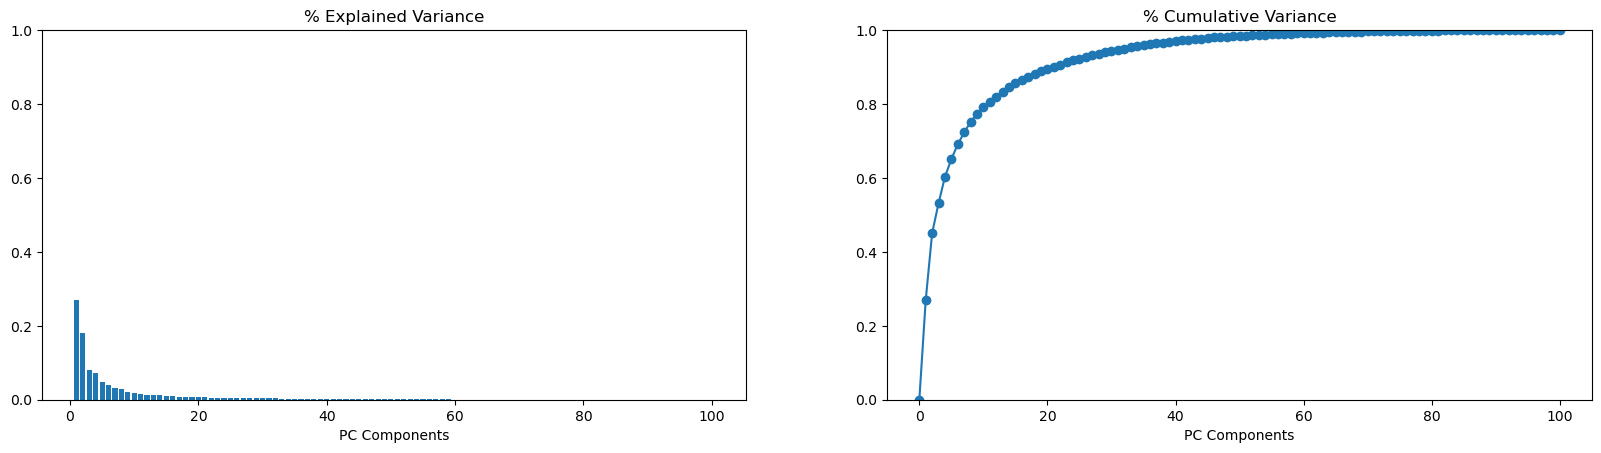

In [102]:
# Plot Cumulative Proportion of Variance

plot_variance(pca)

In [103]:
pca.explained_variance_ratio_[:20]

array([0.26992614, 0.18071664, 0.08073586, 0.07171466, 0.04775254,
       0.04013913, 0.03202428, 0.0282841 , 0.02170848, 0.0191882 ,
       0.01424005, 0.01345674, 0.0133952 , 0.01211131, 0.01091698,
       0.00907201, 0.00834673, 0.00760625, 0.00685834, 0.00644416])

In [104]:
# Cumulative Proportion of Variance 80% PC1 - PC11

np.sum(pca.explained_variance_ratio_[:11])

0.8064300571271492

In [105]:
# Cumulative Proportion of Variance 90% PC1 - PC22

np.sum(pca.explained_variance_ratio_[:22])

0.906793932852253

# Mutual Info Regression

In [106]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# source: https://www.kaggle.com/code/ryanholbrook/principal-component-analysis

In [107]:
mi_scores = make_mi_scores(X_train_pca_scores, y_train, discrete_features=False)

In [108]:
mi_scores[:20]

PC1     0.250891
PC9     0.109394
PC6     0.087327
PC3     0.075286
PC2     0.061632
PC16    0.057992
PC42    0.056487
PC67    0.043320
PC79    0.042595
PC88    0.041311
PC82    0.040918
PC70    0.040787
PC71    0.038803
PC4     0.038379
PC44    0.035252
PC95    0.035203
PC31    0.034761
PC72    0.033567
PC76    0.033322
PC58    0.032969
Name: MI Scores, dtype: float64

PC1 has the highest mutual information (MI) score, and this is expected as PC1 holds the highest variance/information. However, it is interesting to see that PC42, PC79, and others with the high PC component's numbers are included in the top 10th.

# Linear Regression

In [113]:
# Cumulative Proportion of Variance 80%

model_01 = LinearRegression()
model_01.fit(X_train_pca_scores.iloc[:,:11], y_train)

X_valid_pca = pca.transform(X_valid)
X_valid_pca_scores = pd.DataFrame(X_valid_pca, columns=pc_components)

y_pred = model_01.predict(X_valid_pca_scores.iloc[:,:11])

rmse_valid = root_mean_squared_error(y_pred,y_valid)
print('RMSE Linear Regression (Valid): ', round(rmse_valid,4))

RMSE Linear Regression (Valid):  0.1354


In [114]:
# Cumulative Proportion of Variance 90%

model_02 = LinearRegression()
model_02.fit(X_train_pca_scores.iloc[:,:22], y_train)

X_valid_pca = pca.transform(X_valid)
X_valid_pca_scores = pd.DataFrame(X_valid_pca, columns=pc_components)

y_pred = model_02.predict(X_valid_pca_scores.iloc[:,:22])

rmse_valid = root_mean_squared_error(y_pred,y_valid)
print('RMSE Linear Regression (Valid): ', round(rmse_valid,4))

RMSE Linear Regression (Valid):  0.1368


In [121]:
# MI Score higher than 0.1

model_03 = LinearRegression()
model_03.fit(X_train_pca_scores.loc[:,['PC1','PC9']], y_train)

X_valid_pca = pca.transform(X_valid)
X_valid_pca_scores = pd.DataFrame(X_valid_pca, columns=pc_components)

y_pred = model_03.predict(X_valid_pca_scores.loc[:,['PC1','PC9']])

rmse_valid = root_mean_squared_error(y_pred,y_valid)
print('RMSE Linear Regression (Valid): ', round(rmse_valid,4))

RMSE Linear Regression (Valid):  0.1936


Based on the RMSE on the validation set, Linear Regression with PC1 - PC11 (Cumulative Proportion of Variance 80%) provides the better accuracy than other scenarios.

In [122]:
# RMSE for test set using model_01

X_test_pca = pca.transform(X_test)
X_test_pca_scores = pd.DataFrame(X_test_pca, columns=pc_components)

y_pred_test = model_01.predict(X_test_pca_scores.iloc[:,:11])

rmse_test = root_mean_squared_error(y_pred_test,y_test)
print('RMSE Linear Regression (Valid): ', round(rmse_test,4))

RMSE Linear Regression (Valid):  0.1345


The result is worse than Linear Regression using 100 original features. It means feature extraction leveraging PCA is not helpful to improve the model accuracy.

# Investigation

<Axes: xlabel='PC1', ylabel='PC2'>

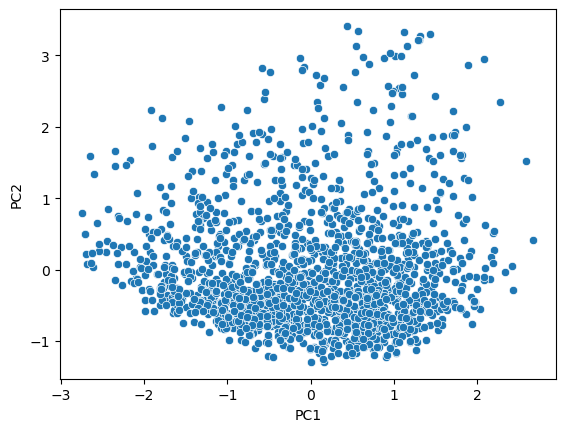

In [127]:
# Plot PC1 and PC2 Scores

sns.scatterplot(x=X_train_pca_scores.loc[:,'PC1'], y=X_train_pca_scores.loc[:,'PC2'])

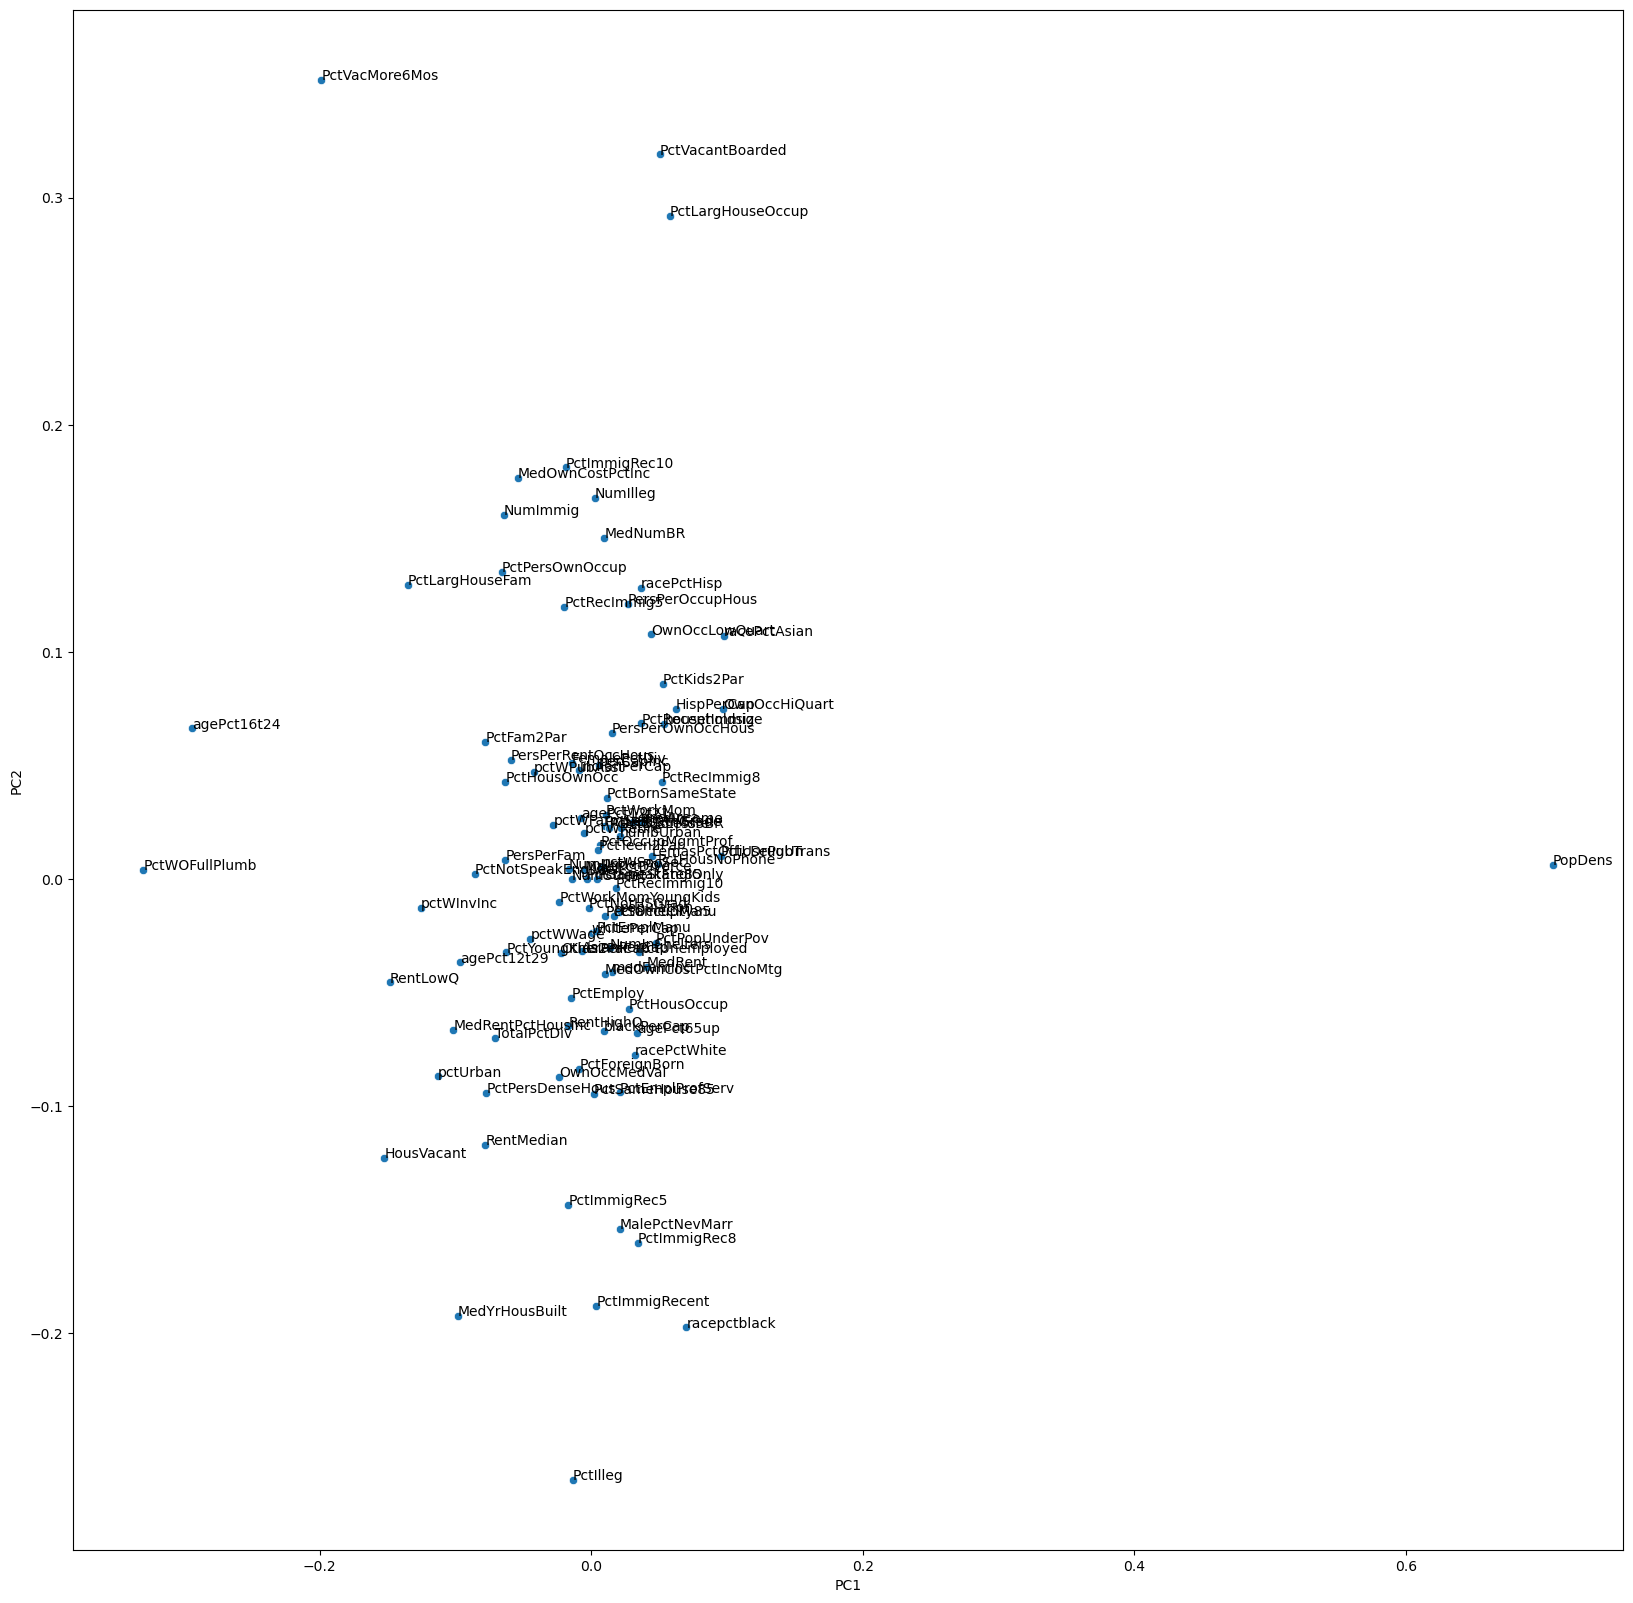

In [143]:
# Plot PC1 and PC2 Loadings

plt.figure(figsize=(20,20))

ax = sns.scatterplot(x=X_train_pca_loadings.loc[:,'PC1'], y=X_train_pca_loadings.loc[:,'PC2'])
for i, txt in enumerate(X_train.columns):
    ax.annotate(txt, (X_train_pca_loadings.loc[:,'PC1'][i],X_train_pca_loadings.loc[:,'PC2'][i]))

- PC1 is mostly influenced by "PopDens" (positive), "agePct16t24" (negative), and "PctWOFullPlumb" (negative).
- PC2 is mostly influenced by "Pctilleg" (negative), "PctLargeHouseOccup" (positive), "PctVacantBoarded" (positive), and "PctVacMore6Mos" (positive).

<Axes: xlabel='PopDens', ylabel='agePct16t24'>

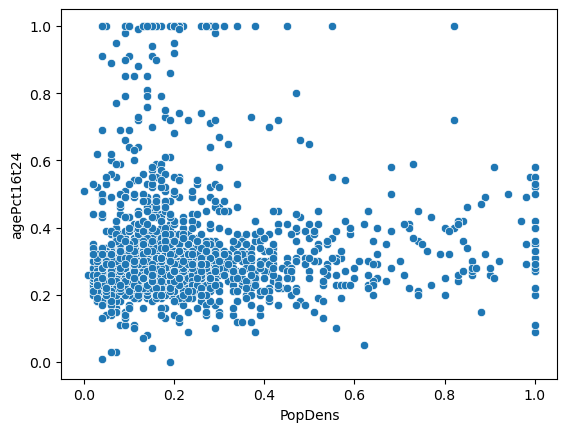

In [146]:
# No significant correlation between 'PopDens' and 'agePct16t24'

sns.scatterplot(x=X_train['PopDens'],y=X_train['agePct16t24'])

<Axes: xlabel='PopDens', ylabel='PctWOFullPlumb'>

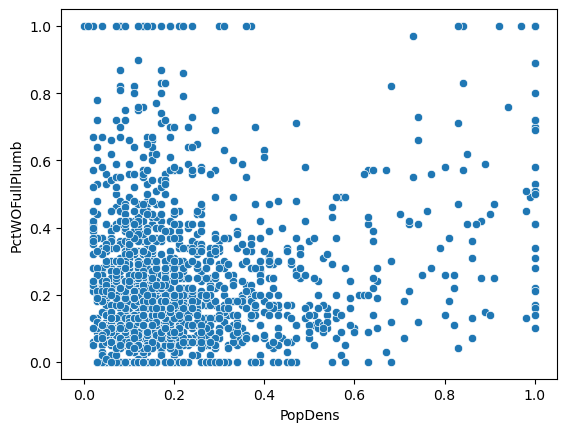

In [148]:
# No significant correlation between 'PopDens' and 'PctWOFullPlumb'

sns.scatterplot(x=X_train['PopDens'],y=X_train['PctWOFullPlumb'])

<Axes: xlabel='agePct16t24', ylabel='PctWOFullPlumb'>

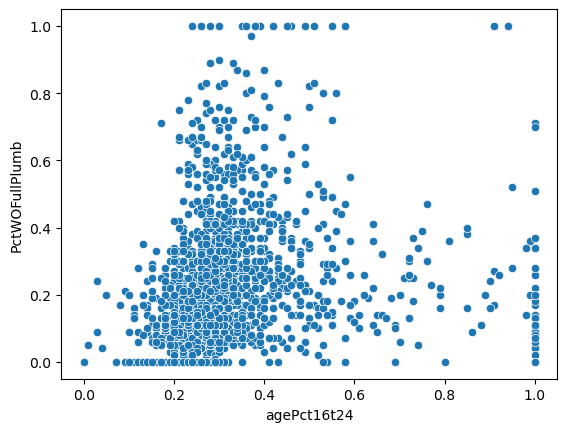

In [156]:
# No significant correlation between 'agePct16t24' and 'PctWOFullPlumb'

sns.scatterplot(x=X_train['agePct16t24'],y=X_train['PctWOFullPlumb'])

Text(0, 0.5, 'ViolentCrimesPerPop')

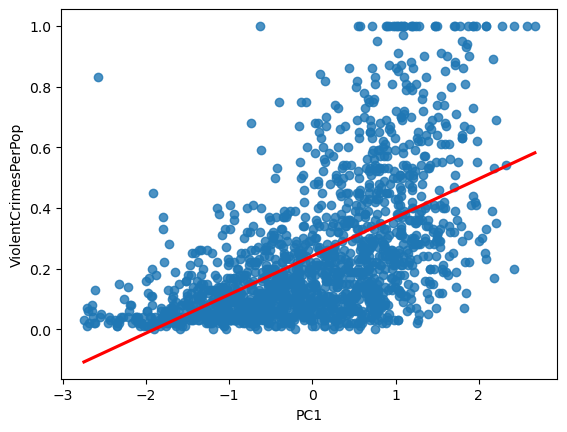

In [137]:
# Plot PC1 and crimes rate

ax = sns.regplot(x=X_train_pca_scores.loc[:,'PC1'], y=y_train, ci=None, line_kws=dict(color="r"))
ax.set_ylabel('ViolentCrimesPerPop')

PC1 is not super intuitive in explaining Crimes Rate, but this is acceptable as it holds only ~20% information from the original features.

Text(0, 0.5, 'ViolentCrimesPerPop')

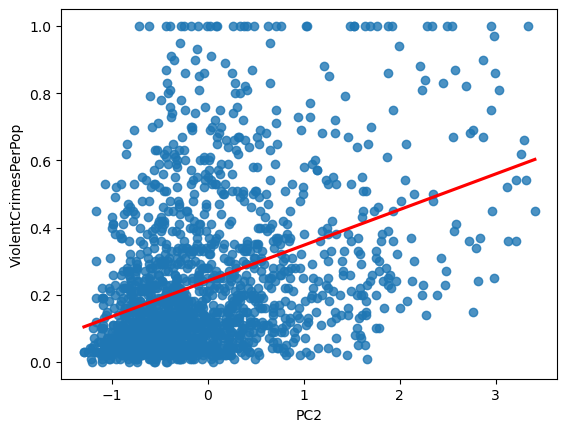

In [138]:
# Plot PC2 and crimes rate

ax = sns.regplot(x=X_train_pca_scores.loc[:,'PC2'], y=y_train, ci=None, line_kws=dict(color="r"))
ax.set_ylabel('ViolentCrimesPerPop')

# Conclusion

In this case, implementing PCA to discover important relationships in the data as well as to reduce the dimension is not helpful to get a better accuracy. However, we learn that using 11 PC components representing 80% of total variance (information) can provide us RMSE which is only slightly lower than the base model.